In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
sys.path.insert(0, '.')
sys.path.insert(0, '..')

In [3]:
import yaml

with open("../food2vec/settings.yml", "rb") as yaml_to_read:
    yml = yaml.safe_load(yaml_to_read)

# Reading data

In [71]:
from food2vec.dataprep import DataLoader

In [4]:
filepath = os.path.join(yml['base_dir'], yml['data_dir'], yml['train_data'])
label_colname = yml['label_col']
ingrd_colname = yml['ingrd_col']
batch_size = yml['batch_size']
max_window_size = yml['max_window_size']
num_noise_words = yml['num_noise_words']

In [10]:
dl = DataLoader()
df, texts, labels = dl.get_texts_labels(filepath, label_colname, ingrd_colname)

# Getting food vectors

In [109]:
from food2vec.utils.food2vec_utils import *

In [ ]:
# from food2vec.utils.pretrained_embeddings_utils import LoadEmbeddings
# tmp = LoadEmbeddings('glove')
# tmp.embeddings['salt']

In [45]:
food_vec = get_food_vectors(texts, 'glove')

loading GloVe embeddings ...


In [46]:
print(len(food_vec))
print(len(labels))

9971
9971


# Find similar food

In [119]:
sorted_scores, most_similar, least_similar = find_similar_food('Pepsi Zero Sugar Soda - 6pk / 16.9 Fl Oz', food_vec, labels)

In [118]:
print("Most similar: ")
print("-"*15)
print(", \n".join(most_similar))
print("="*50)
print("Least similar: ")
print("-"*15)
print(", \n".join(least_similar))

Most similar: 
---------------
Diet Dr Pepper, 12 fl oz, 
Coke Zero - 8.5 Fl Oz, 
Diet Aw Cream Soda 12 Fl Oz 12 Pk, 
Pepsi Zero Sugar Soda 12oz 12pk, 
Diet Dr Pepper 12 Fl Oz 12 Pk
Least similar: 
---------------
31450 Micro-Scrubbers Disinfecting Wipes, 32 Count, 
Riceselect Royal Blend, Texmati White, Brown, Wild, Red Rice, 
Twinings174 Naturally Decaffeinated English Breakfast Tea K-Cup Pods - 18ct, 
Schweppes Black Cherry Ginger Ale, 2 L, 
Crush Grape Soda, 12 Oz, 12pk


# Find similar food based on ingredients: 7-11 Foods

In [147]:
import pandas as pd
recipes = pd.read_csv('../data/food_ingredients_711.csv')
recipes = recipes.loc[recipes["productname"].notnull(),]
recipes = recipes.loc[recipes["category"].notnull(),]
recipes.head(20)

OrderableUPC        productname  category            brand  \
0    28498000425             Muffin   SNKCAKE    BROWNIE BAKER   
2    46704068403       Potato Skins   FRZNSNK      TGI FRIDAYS   
5    25600088944             Donuts   SNKCAKE        TASTYKAKE   
7    72220220315             Donuts   SNKCAKE            FRANZ   
8   674971538055            Squares   SNKCAKE     DANCING DEER   
9    72220220568         Donuts O's   SNKCAKE            FRANZ   
10   42272001637  Mexican Casserole  FRZNMEAL             Amys   
11   74323091823         Pound Cake   SNKCAKE            BIMBO   
14   70821000428              Bread     BREAD       GOLD MEDAL   
15   25600007099                Pie   SNKCAKE        TASTYKAKE   
17   29394241493        Angel Wings   SNKCAKE         Delicias   
19   72250037129              Bread     BREAD      NATURES OWN   
20   25600002278           Krimpets     BREAD        TASTYKAKE   
21   74323029604            Cookies   SNKCAKE         MARINELA   
22   25600009673       Flavored Pie   SNKCAKE        TASTYKAKE   
25   14100071198              Bread     BREAD  PEPPERIDGE FARM   
26   74323002447      Crispy Wheels    COOKIE            BIMBO   
27   72030019505               Cake   SNKCAKE       ENTENMANNS   
30   14100088219              Bread     BREAD  PEPPERIDGE FARM   
31   43695071108         Sandwiches  FRZNMEAL      HOT POCKETS   

                                          ingredients  
0   Sugar, Enriched Bleached Flour (Wheat Flour, F...  
2   Potato Skins (Potatoes, Water, Batter Mix, (Mo...  
5   Enriched Unbleached and Bleached Flour (Wheat ...  
7   Donut Mix: Enriched Bleached Wheat Flour (Whea...  
8   Unbleached Unbromated Wheat Flour (Wheat Flour...  
9   Donut Mix: Enriched Bleached Wheat Flour (Whea...  
10  Filtered Water, Organic Corn, Organic Corn Mas...  
11  Wheat Flour,Sugar,Egg,Water,Raisins,Xanthan Gu...  
14  Enriched Flour (Flour, Barley Malt, Niacin, Ir...  
15  Enriched Flour (Wheat Flour, Niacin, Iron, Thi...  
17    Wheat Flour, Vegetable Margarine, Sugar, Water.  
19  Stone Ground Whole Wheat Flour, Water, Yeast, ...  
20  Sugar, Enriched Bleached Flour (Wheat Flour, N...  
21  Wheat Flour, Sugar, Vegetable Shortening (Palm...  
22  Water, Unbleached Enriched Flour (Wheat Flour,...  
25  Unbromated Unbleached Enriched Wheat Flour (Fl...  
26  Sugar, Wheat Starch, Water, Cottonseed Oil, Wh...  
27  Sugar, Water, Palm Oil, Bleached Wheat Flour, ...  
30  Made from: Whole Wheat Flour, Water, Oats, Whe...  
31  Enriched Flour (Wheat Flour, Malted Barley Flo...

In [150]:
labels_711 = list(recipes["productname"].values)
texts_raw_711 = list(recipes["ingredients"].values)

In [148]:
index = labels_711.index('Bread')
index

8

In [149]:
a = get_food_vectors([texts_raw_711[index]], 'glove')

loading GloVe embeddings ...


In [151]:
sorted_scores, most_similar, least_similar = find_similar_food_byVec(a[0], food_vec, labels)

In [146]:
print("Most similar: ")
print("-"*15)
print(", \n".join(most_similar))
print("="*50)
print("Least similar: ")
print("-"*15)
print(", \n".join(least_similar))

Most similar: 
---------------
Marketside Bake at Home Demi Baguette, 2 ct, 12 oz, 
Gold Emblem Oyster Crackers, 15CT, 
Chatham Village Cheese _ Garlic Large Cut Croutons 5 oz. Bag, 
Healthy Life 100% Whole Wheat Whole Grain Bread, 
Nickles Wheat Hot Dog Buns, 16 oz
Least similar: 
---------------
Cortas Pomegranate Molasses, 
Trolli Sour Brite Crawlers Gummy Candy, 
Broadway Basketeers Gourmet Gift Basket, 
Organic Cardamom, 
Rose Extract (holy Lama Spice Drops: Natural Spice Extract, Natural Flavouring & Natural Essence)


# Get 7-11 food vectors

In [158]:
food_vec711 = get_food_vectors(texts_raw_711, 'glove')

loading GloVe embeddings ...


In [164]:
print(len(food_vec711))
print(len(labels_711))

898
898


## Check if similar foods have large cosine similarity

In [165]:
query_token = 'chicken'
[i for i in labels_711 if query_token in i.lower()]

['Chicken Club Panini',
 'Chicken Strips',
 'Sesame Chicken',
 'Chicken Fried Chicken Meal',
 'Alfredo Chicken',
 'Chicken Egg Rolls',
 'Chicken Salad',
 'White Chicken Salad',
 'Boneless Fried Chicken',
 'Chicken Patties',
 'Chicken Nuggets',
 'Garlic Chicken',
 'Buffalo Chicken Mac & Cheese',
 'Fried Chicken',
 'Chicken Salad',
 'Chicken Fingers',
 'Chicken Enchiladas',
 'Sweet & Sour Chicken',
 'Chicken Bowl',
 'Chicken Wings',
 'Chicken Enchilada Bake']

In [166]:
print(get_food_index(labels_711, 'Chicken Fried Chicken Meal'))
print(get_food_index(labels_711, 'Boneless Fried Chicken'))

118
418


In [167]:
calc_cosine_similarity(food_vec711[78], food_vec711[418])

array([0.92118185])

### Comparing fried chicken & donut similarity

In [170]:
calc_cosine_similarity(food_vec711[2], food_vec711[418])

array([0.74909031])

# t-SNE visualization

In [171]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
# import re
# import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

unable to import 'smart_open.gcs', disabling that module


In [172]:
def tsne_plot(labels, tokens):
    "Creates and TSNE model and plots it"
#     labels = []
#     tokens = []

#     for word in model.wv.vocab:
#         tokens.append(model[word])
#         labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

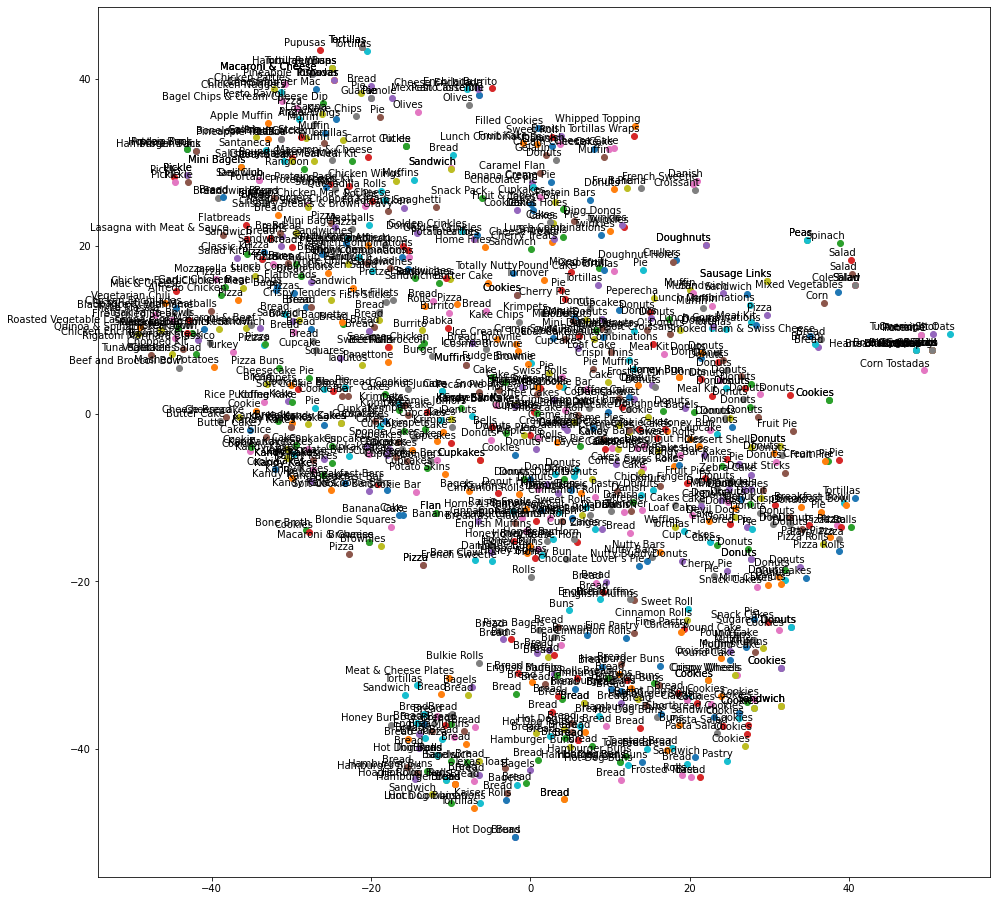

In [175]:
tsne_plot(labels_711, food_vec711)

In [176]:
category_711 = list(recipes["category"].values)

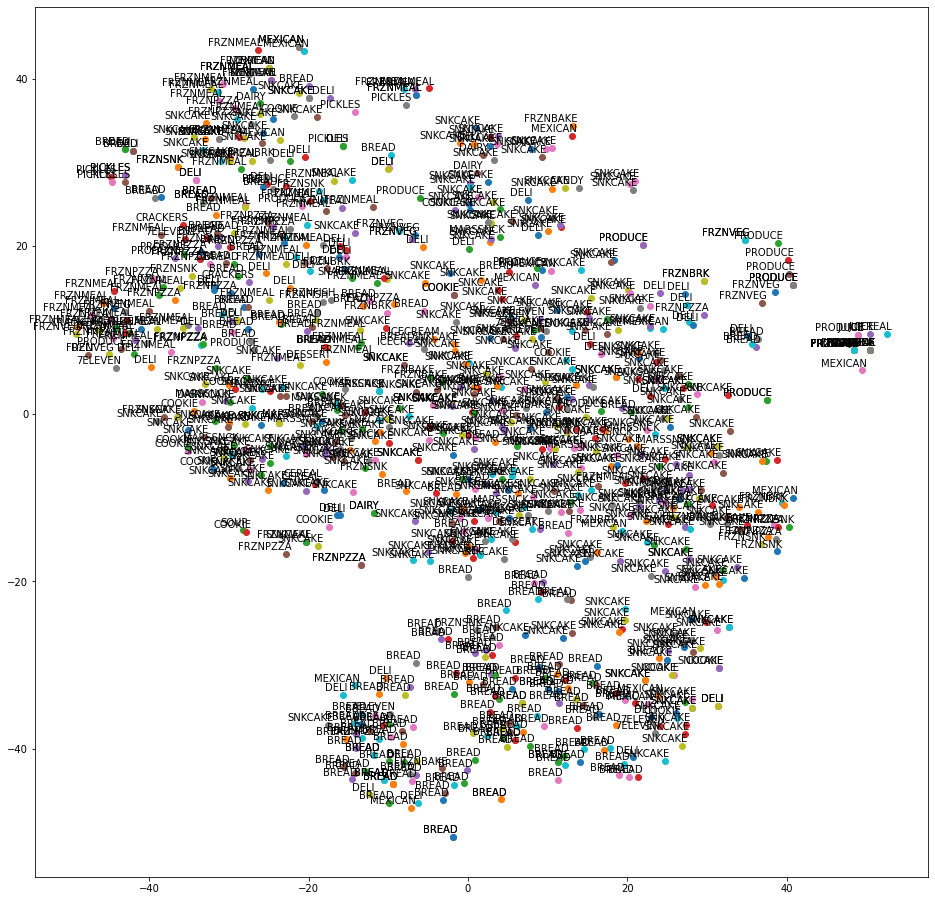

In [177]:
tsne_plot(category_711, food_vec711)

In [193]:
import random
random.seed(0)
ids = random.sample(range(0, len(food_vec711)), 100)
ids200 = random.sample(range(0, len(food_vec711)), 200)

In [189]:
cats = [labels_711[i] for i in ids]
vecs = [food_vec711[i] for i in ids]

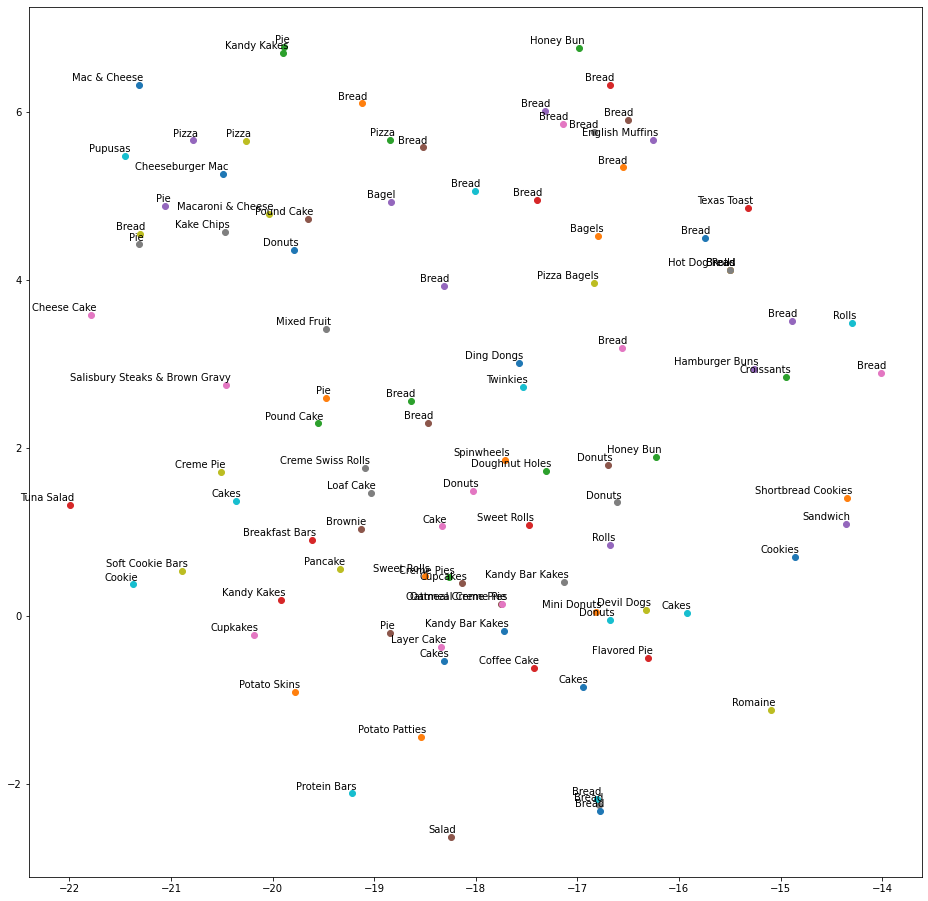

In [190]:
tsne_plot(cats, vecs)

# Other Ideas

1. Use food embeddings as input for some downstream tasks. 
    - Create customer segmentation focused on fresh foods behavior. No need to do feature engineering. Just directly use the food vectors that a customer buys as features.
    - Training a classifier: if in a problem, food consumption is supposed to tie into predicting certain behavior, food vector could be easily used wrapped in Embedding Layer.
    - Popular applications include prediction tweet sentiments.
    
2. We can also get food vectors based on nutritional facts. They will capture different contextual structure. Such vectors could potentially be used to rate our foods on their level of healthiness.

3. The Food2Vec can easily be extended to include all 7-11 products.

# Next Steps

- Train on 1M data 
- Find the best embedding from:
    - Trained from scratch only on 1M data
    - BERT (and its variations)
    - GloVe
    - Gensim W2V
- Get food vectors based on nutritional facts
    - Explore its relation with food vectors coming from ingredients
- Is there a better way than averaging for getting food vector from its ingredient vectors?
- Add README
- Package it